In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Coger datos de MNIST

import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# MODELO
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784,name='entrada'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# FUNCION DE COSTE, OPTIMIZADOR Y METRICA
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['binary_accuracy'])



Instructions for updating:
Colocations handled automatically by placer.


# Resumen

In [0]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


# Imprimir en .png

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')


# Por pantalla 

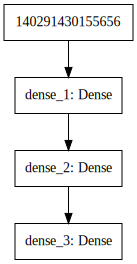

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Lista de capas

In [0]:
aa = model.layers
print(aa)

[<keras.layers.core.Dense object at 0x7f91b9b72710>, <keras.layers.core.Dense object at 0x7f91b9b72390>, <keras.layers.core.Dense object at 0x7f91a972d898>]


# Lista de entradas/salidas

In [0]:
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'dense_1_input:0' shape=(?, 784) dtype=float32>]
[<tf.Tensor 'dense_3/Softmax:0' shape=(?, 10) dtype=float32>]


# Diccionario con la configuración del modelo

In [0]:
model.get_config()

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale': 1.0,
      'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_1',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale'

# Devuelve los pesos

In [0]:
model.get_weights()

[array([[-0.03797797, -0.00136545,  0.02943082, ..., -0.02465195,
         -0.0623723 , -0.01566539],
        [-0.04095358,  0.06417762,  0.02072557, ...,  0.07151685,
         -0.03954118,  0.0540833 ],
        [-0.05497293, -0.06435886, -0.07703603, ..., -0.07046221,
         -0.01244297,  0.07101602],
        ...,
        [ 0.0638845 ,  0.00920771, -0.01158534, ..., -0.0257381 ,
          0.01357975, -0.07844546],
        [-0.068421  ,  0.01271114, -0.03393627, ...,  0.02968761,
          0.06883641,  0.05494867],
        [ 0.02618566, -0.01974778, -0.046256  , ...,  0.03121464,
         -0.01360522,  0.03993569]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.13471155,  0.07609873, -0.08657144, ..., 

# Pone los pesos

In [0]:
weights = model.get_weights()
model.set_weights(weights)

In [0]:
# ENTRENAMIENTO
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.1213 - binary_accuracy: 0.8778
Epoch 2/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0970 - binary_accuracy: 0.9023
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0757 - binary_accuracy: 0.9239
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0721 - binary_accuracy: 0.9275
Epoch 5/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0632 - binary_accuracy: 0.9364
Epoch 6/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0569 - binary_accuracy: 0.9428
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0548 - binary_accuracy: 0.9449
Epoch 8/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0537 - binary_accuracy: 0.9461
Epoch 9/20
60000/60000 [==============================] 

In [0]:
#EVALUACIÓN
score = model.evaluate(x_test, y_test, batch_size=128)

score

10000/10000 [==============================] - 0s 12us/step


[0.036735865345597266, 0.9631600275039672]

# Indice
## Capitulo
1.- cosas

2.- otras cosas